  + Tanto la **covarianza** como la **correlación** se refieren a la relación entre las variables.
  
    + La **covarianza** define la **asociación direccional entre las variables**. Los valores de covarianza van de -inf a +inf donde un valor positivo denota que ambas variables se mueven en la misma dirección y un valor negativo denota que ambas variables se mueven en dirección opuestas.
    
    + La **correlación** es una medida estadística estandarizada que **expresa el grado en que dos variables estan relacioandas linealmente**. La fuerza y la asociación direccional de la relación entre dos variables se definen por correlación y varía de -1 a +1. Un valor positivo denota que ambas variables se mueven en la misma dirección, mientras que un valor negativo nos dice que se mueven en direcciones opuestas.



In [134]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# Load CSV

petalos = pd.read_csv('/content/drive/MyDrive/IT Academy - Data Science/ Sprint 9 - Correlation, Feature Scaling & Feature Engineering/Practise/Data/Iris.csv')
petalos.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
# Shape
petalos.shape

(150, 6)

In [137]:
with open('/content/drive/MyDrive/IT Academy - Data Science/ Sprint 9 - Correlation, Feature Scaling & Feature Engineering/Practise/Data/Iris.csv', 'r') as f:
  g = f.readlines()

  petal_lenght = [float(x.split(',')[3]) for x in g[1:]] # Esta variable devuelve una lista del largo del pétalo
  petal_width = [float(x.split(',')[4]) for x in g[1:]] # Esta variable devuelve una lista del ancho del pétalo

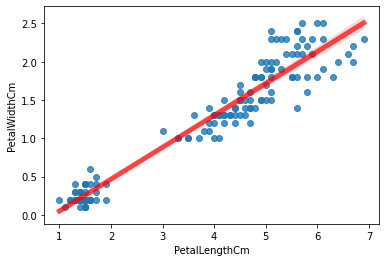

In [138]:
# Graphics

sns.regplot(x= petalos['PetalLengthCm'], y= petalos['PetalWidthCm'], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Los puntos del gráfico parecen tener una alta correlación cerca de la línea de regresión. Veamos si nuestras observaciones coinciden con sus valores de covarianza y correlación.

# CÁLCULO DE LA COVARIANZA

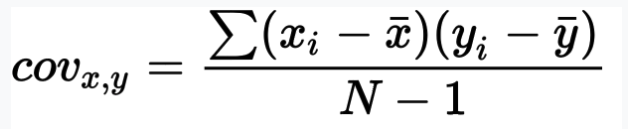

Xi y Yi son elementos individuales de las series x e y


x^ y y^ son las medias matemáticas de las series x e y


N es el número de elementos de la serie. El denominador es N para un conjunto de datos completo y N - 1 en el caso de una muestra. Como nuestro conjunto de datos es una pequeña muestra de todo el conjunto de datos de Iris, usamos N - 1.

In [139]:
def covariance(x, y):

  # Encontrar las medias de las series x and y
  mean_x = sum(x)/float(len(x))
  mean_y = sum(y)/float(len(y))

  # Restar la media a cada observacion
  sub_x = [i - mean_x for i in x]
  sub_y = [i - mean_y for i in y]

  numerador = sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])
  denominator = len(x) - 1

  cov = numerador/denominator

  return cov

funcion_covarianza = covariance(petal_lenght, petal_width)
print('La covarianza entre el petal_length y el petal_width es:', funcion_covarianza)

La covarianza entre el petal_length y el petal_width es: 1.2963874720357946


El valor positivo denota que ambas variables se meueven en la misma dirección

# CÁLCULO DE LA CORRELACIÓN
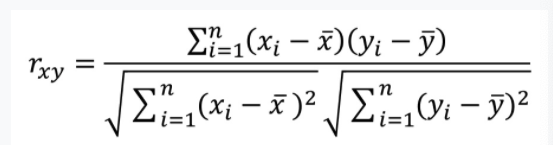

Para calcular la correlación entre dos variables se usa la r de Pearson

Los denominadores, a diferencia de la covarianza, corresponden a las desviaciones estándard individuales de x e y 

In [140]:
# R de Pearson

def correlation(x,y):

 # Encontrar las medias de las series x and y
  mean_x = sum(x)/float(len(x))
  mean_y = sum(y)/float(len(y))

  # Restar la media a cada observacion
  sub_x = [i - mean_x for i in x]
  sub_y = [i - mean_y for i in y]

  # Numerador
  numerador = sum([sub_x[i] * sub_y[i] for i in range(len(sub_x))])

  # Desviaciones estándar de x e y
  std_deviation_x = sum([sub_x[i]**2 for i in range(len(sub_x))])
  std_deviation_y = sum([sub_y[i]**2 for i in range(len(sub_y))])

  # Denominador
  denominator = np.sqrt(std_deviation_x)*np.sqrt(std_deviation_y)

  # Correlation
  corr = numerador/denominator

  return corr

funcion_correlacion = correlation(petal_lenght, petal_width)
print('La correlación entre el petal_length y el petal_width es:', funcion_correlacion)

La correlación entre el petal_length y el petal_width es: 0.9627570970509668


Podemos confirmar que hay una fuerte correlación entre el largo y el ancho del pétalo de la flor 